## A simple diffusion problem

This problem is from Dr. Scott Socolofsky's EFM problem dictionary 


In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Data

In [5]:
r = 5e-2; # m
t = np.arange(0.5, 10.5, 0.5)  # day
t_sec = t*24*3600; # convert to second
c = np.array([0.02, 0.5, 2.08, 3.66, 4.81, 5.5, 5.8, 5.91, 5.81, 5.7, 
    5.54, 5.28, 5.05, 4.87, 4.65, 4.4, 4.24, 4, 3.84, 3.66])

First, let's plot the data directly.

Text(0, 0.5, 'C ($\\mu g/cm^3$)')

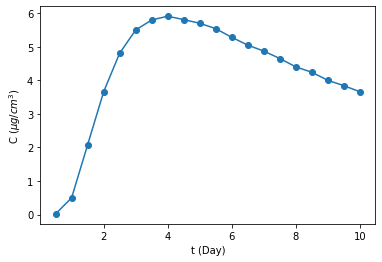

In [11]:
plt.plot(t,c,'o-')
plt.xlabel('t (Day)')
plt.ylabel(r'C ($\mu g/cm^3$)')

The curve is apparently not linear. Hence, we need to manipulate the data to obtain a linear relationship. From the theory of diffusion, we understand that the solution of three-dimensional point-source diffusion is:

$C = \frac{M}{(4\pi D t)^{3/2}} \exp \left( -\frac{r^2}{4Dt} \right)$

where $C$ is concentration, $t$ is time, $r$ is distance from the point source, and $D$ is the diffusion coefficient. Hence, we can manipulate the equation: 

$\exp\left( -\frac{r^2}{4Dt}\right) = \frac{C}{M}(4\pi D t)^{3/2}$

$-\frac{r^2}{4Dt} = \ln\left(\frac{C}{M} (4\pi D t)^{3/2} \right)$

$-\frac{r^2}{4t} = D \ln\left(\frac{C}{M} (4\pi D t)^{3/2} \right)$

$-\frac{r^2}{4t} = D \ln\left(Ct^{3/2} \right) + D \ln\left( \frac{(4\pi D)^{3/2}}{M}\right)$

The above equation is a linear function between variables $-r^2/(4t)$ and $\ln(Ct^{3/2})$. Therefore, we can plot these two variables. By doing a linear regession, we can find the diffusion coefficient (the slope of the linear fitted line) 

In [12]:
x = np.log(c*t**1.5);
y = -r**2/(4*t);

D is 0.000118 cm^2/s


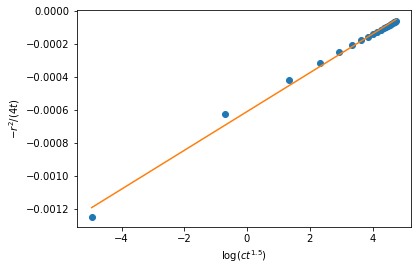

In [22]:
plt.plot(x,y,'o')
m,b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b)
plt.xlabel(r'$\log(ct^{1.5})$')
plt.ylabel(r'$-r^2/(4t)$');
print('D is %f cm^2/s' %m)

We can see from the data that the diffusion process is slow. Therefore, measurement of time is not very sensitive, compared with measurement of concentration. In another word, errors in time measurements are not as important as errors in concentration measurements. 

From the second plot, it is clearly seen that more data points may be needed in the large stage. Hence, increasing the measurement frequency in the beginning of the experiment will be helpful. 
